<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML3_professor_resolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Vem comigo e vamos aplicar o Classificador Logístico!**
---




In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

In [71]:
#@title #**Which Candidates will get admitted to a prestigious university?**
# adaptado de https://datatofish.com/multiple-linear-regression-python/
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
display(df)







,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


# Short Way...



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/MLLogistic.png" width=800, align="center">

In [72]:
from sklearn.linear_model import LogisticRegression

# Entradas e Saídas
X = df.drop(columns='admitted')
y = df['admitted']

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))




0.9


In [73]:
pd.DataFrame({'admitted': y, 'admitted_predictions': y_pred, 'Correct?': y == y_pred})

,admitted,admitted_predictions,Correct?
0,1,1,True
1,1,1,True
2,0,1,False
3,1,1,True
4,0,1,False
5,1,1,True
6,0,0,True
7,1,1,True
8,1,1,True
9,0,0,True


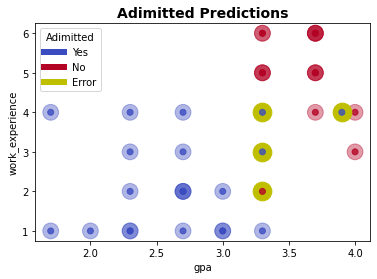

In [74]:
#@markdown Graph
cmap_data = plt.cm.coolwarm 
X_copy = X.copy() # save to restore at the end

y_pred = clf.predict(X)

X['x1'] = X['gpa']
X['x2'] = X['work_experience']

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.8)
plt.scatter(X.x1, X.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.4)

plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, c=y[y_pred != y], cmap=cmap_data, alpha=0.8)
plt.title('Adimitted Predictions',weight='bold',fontsize=14)
plt.xlabel('gpa')
plt.ylabel('work_experience')

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['Yes', 'No', 'Error'], loc='upper left',title='Adimitted')

plt.show()

X = X_copy.copy() # restore at the end

# Better Way...

# Diminuido o risco de *Overfitting*: Conjuntos de Treinamento e Teste




![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/TrainTest.png?raw=true)

In [75]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

# Entradas e Saídas
X = df.drop(columns='admitted')
y = df['admitted']

# Separação Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X_train,y_train)

# Avaliação
y_pred = clf.predict(X_test)

print( clf.score(X_test,y_test) )

1.0


In [76]:
pd.DataFrame({'admitted': y_test, 'admitted_predictions': y_pred, 'Correct?': y_test == y_pred})

,admitted,admitted_predictions,Correct?
7,1,1,True
12,1,1,True
15,0,0,True
24,0,0,True
21,0,0,True
0,1,1,True
6,0,0,True
1,1,1,True
5,1,1,True
22,0,0,True


# Cuidados

* A regressão logística é um classificador binário, mas a implementação do scikit-learn possibilita classificação multinomial (`multi_class='auto'`)

* Note, a regressão logística, assim com a regressão linear, permite somente variáveis preditoras numéricas e variáveis preditoras categóricas precisam ser transformadas (você verá isso mais adiante)

In [77]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv', index_col=0)
display(df)

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

# Entradas e Saídas
X = df.drop(columns='Species')
y = df['Species']

# Separação Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X_train,y_train)

# Avaliação
y_pred = clf.predict(X_test)

print( clf.score(X_test,y_test) )

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


0.9777777777777777


In [78]:
y_pred

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor'], dtype=object)